**Introduction**

This case study is the final task to fulfil the Google Data Analytics Course on Coursera. One has the possibility to choose between different scenarios of which I selected the Bellabeat Case study which has the following background. The report is structured by the different steps of the data analyses process: ask, prepare, process, analyse, share and act.

Bellabeat is a successfull small company. As the high-tech manufacturer of health-focused products for women they already are, they have the pontential to become a larger player in the global smart device market.

**Ask**

**Business Task**

Analyze smart device data to gain insight into how consumers are using their smart devices and discover possible trends to help guide the marketing strategy of Bellabeat. The aim of this analysis is to be able to give high-level recommendations to optimize the markteging strategy.

**Business objectives**

* What are some trends in smart device usage?
* How would these trends apply to bellabeat users?
* How could these trends help influence Bellabeat marketing strategy?

**Prepare**

**Data used**

As encouraged by one of the stakeholders fitbit Fitabase Data which is publicy available on Kaggle is used (CCO: Public Domain, dataset made availble through Mobius). Before starting with the report I checked the possibility of adding also further data sources to this analyses such as data about menstrual cycles (as it have an important impact on performance), hydration levels. etc (information which is used and needed within Bellabeat products). But I was not able to find helpful and credible public data whithin a set period. Finally the data is not containing any information about gender. As bellabeat is focussing on women it might have an impact on the informative value of the results.

The dataset contains personal fitness tracker from thirty fitbit users in 18 .csv files, such as minute-level output for physical activity, heart rate and sleep monitoring, daily activity, steps and heart rate. It is generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.

**Bias and credibility of data**

To simplify the evaluation of the data I will check whether the data are ROCCC, reliable,original, comprehensive, current and cited.

* Reliable - reliability is quite low as the sample size is only 30.
* Original - as its collected via a third party we have no further information about that
* Comprehensive - it is still okay as it contains several health data that could be connected   to Bellabeat products. Some limitations such as no information about gender, age, weight     (for all users), etc.
* Current - not really as the dataset is already more than 5 years old.
  Cited - unknown, as it is third party data.
* To summarize: I woud say this dataset could be used to get a first impression of which       trends there might be or might have been. To really optimize the marketing strategy it will   not be expressive enough (small data set, no idea about gender and therefore the sample       quality). Nonetheless one can get a first idea and develop which further information is to   verify the outcomes.

**Process**

I used R as tool for my analysis as I have the possibility to work with a high amount of data and to directly visualize them to identify possible correlations. Furthermore one has many possibilities to easily clean the data for proper analysis.

Starting with exploring the dailyActivity_merged table I figured out that all necessary information also from the other tables are included except of information about sleeping routines. This is why I wanted to merge those tables. Beforehead I edited the SleepDay information with splitting the information of date and time in seperate columns.

All in all I started my analysis with installing the necessary packages:



In [1]:
install.packages('tidyverse')
library(tidyverse)

install.packages("dplyr")
library(dplyr)

install.packages("lubridate")
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



To get an idea about the data I checked the different tables.

In [2]:
dailyActivity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
glimpse(dailyActivity)
summary(dailyActivity)
colnames(dailyActivity)
head(dailyActivity)

sleepDay <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
glimpse(sleepDay)
summary(sleepDay)
colnames(sleepDay)
head(sleepDay)

weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
summary(weight)
colnames(weight)
head(weight)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport         LogId          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                      3rd 

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


After getting an overview about the different tables ( I chose above three tables as they are containing more or less all necessary information) I started with transforming the data so that it is most effective for my analysis.

At the very beginning I started with checking the datasets for NA and NULL values.

In [3]:
sum(is.na(dailyActivity))
sum(is.null(dailyActivity))

[1] 0

[1] 0

In [4]:
sum(is.na(sleepDay))
sum(is.null(sleepDay))

[1] 0

[1] 0

In [5]:
sum(is.na(weight))
sum(is.null(weight))

[1] 65

[1] 0

As the weight dataset is the only one here where I found na values. I explored further where to find these values within the dataset.

In [6]:
colSums(is.na(weight))

Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0              0

As all na values are to be found within the column FAT I will simply remove it from the dataset for further analysis.

In [7]:
weightEdit <- select(weight, -Fat)
head(weightEdit)

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,27.45,True,1.460938e+12


To ensure effective analysis and to be able to explore correlations the id and the date/ Time values are most important. That is why the next step is to create consistency within the datasets.

In [8]:
sleepEdit <- sleepDay %>%
  separate(SleepDay, c ("ActivityDate", "Time"), " ")
head(sleepEdit)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,ActivityDate,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016,12:00:00,1,327,346
2,1503960366,4/13/2016,12:00:00,2,384,407
3,1503960366,4/15/2016,12:00:00,1,412,442
4,1503960366,4/16/2016,12:00:00,2,340,367
5,1503960366,4/17/2016,12:00:00,1,700,712
6,1503960366,4/19/2016,12:00:00,1,304,320


In [9]:
sum(duplicated(dailyActivity))
n_distinct(dailyActivity$Id)

[1] 0

[1] 33

In [10]:
sum(duplicated(sleepEdit))
n_distinct(sleepEdit$Id)
n_distinct(weightEdit$Id)

[1] 3

[1] 24

[1] 8

As we have only 8 distinct values about the weight, we could leave this information out as the dataset would be way to small.

We have 24 distinct vlaues within the sleepEdit table and 33 in the dailyActivity dataset. As the information about sleep is missing in the dailyActivity dataset I will combine them to get some more insights and to check whether I could find interesting correlations and/ or clusters.

In [11]:
daily_activity_v1 <- dailyActivity %>%
  mutate(ActivityDate = mdy(ActivityDate)) %>%
  mutate(Day = weekdays(as.Date(ActivityDate)))
head(daily_activity_v1)  

sleep_v2 <- sleepEdit %>% 
    mutate(ActivityDate = mdy(ActivityDate)) %>%
    mutate(SleepDay = weekdays(as.Date(ActivityDate)))
head(sleep_v2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


,Id,ActivityDate,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDay
,<dbl>,<date>,<chr>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,12:00:00,1,327,346,Tuesday
2,1503960366,2016-04-13,12:00:00,2,384,407,Wednesday
3,1503960366,2016-04-15,12:00:00,1,412,442,Friday
4,1503960366,2016-04-16,12:00:00,2,340,367,Saturday
5,1503960366,2016-04-17,12:00:00,1,700,712,Sunday
6,1503960366,2016-04-19,12:00:00,1,304,320,Tuesday


Finally, I will be merging the daily activity and sleep files to identify trends between the two in the analyze phase.

In [12]:
activity_sleep <- merge(daily_activity_v1, sleep_v2, by=c("Id", "ActivityDate"))
head(activity_sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDay
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,13,328,728,1985,Tuesday,12:00:00,1,327,346,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,19,217,776,1797,Wednesday,12:00:00,2,384,407,Wednesday
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,34,209,726,1745,Friday,12:00:00,1,412,442,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,10,221,773,1863,Saturday,12:00:00,2,340,367,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,20,164,539,1728,Sunday,12:00:00,1,700,712,Sunday
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,31,264,775,2035,Tuesday,12:00:00,1,304,320,Tuesday


**Analyze & Share**

Now that the data has been cleaned I will start to see whether we can get some helpful Insights.

For simplification reasons I will first have a closer look an a few summarized data.

In [13]:
dailyActivity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

sleep_v2 %>% 
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>% 
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In general one knows that there is a positive impact on burning calories when being active. Here I wnat to check whether the data are giving this back.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


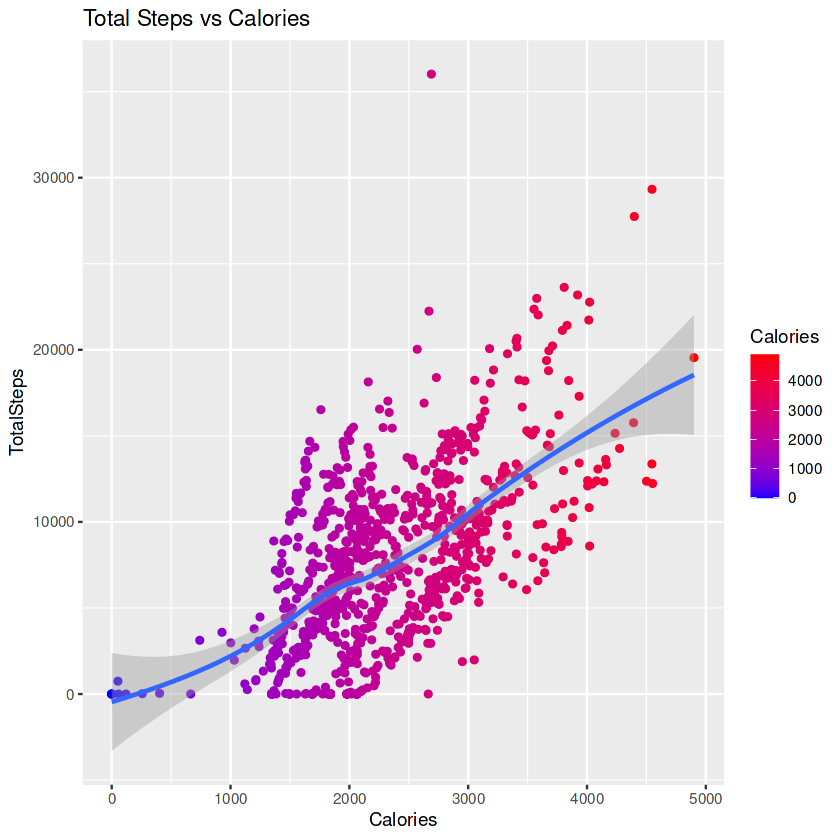

In [14]:
ggplot(dailyActivity, mapping = aes(x = Calories, y = TotalSteps, color = Calories)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Total Steps vs Calories") +
  scale_color_gradient(low = "blue", high = "red")

With this graph we can see that there is a positive correclation between calories and total steps. The more steps one goes, the more calories are burned.

Now would like to check if there is more walking on certain days of the week than on others

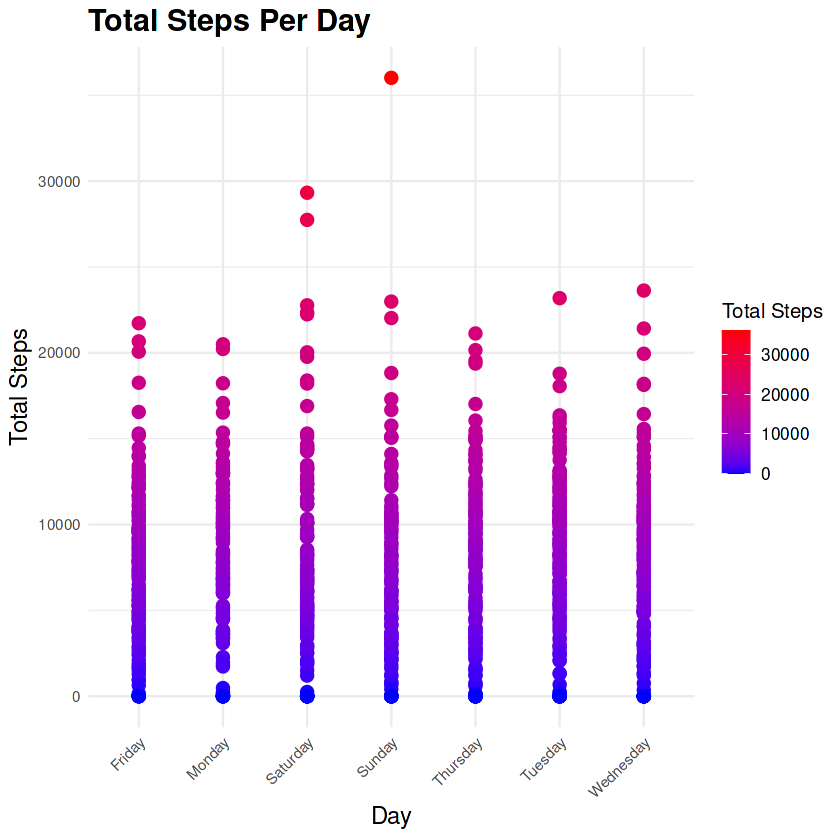

In [15]:

ggplot(daily_activity_v1, aes(x = Day, y = TotalSteps, color = TotalSteps)) +
  geom_point(size = 3) +
  labs(title = "Total Steps Per Day", y = "Total Steps", color = "Total Steps") +
  scale_color_gradient(low = "blue", high = "red") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )


One can see that people are most active at the weekends. This might be due to reasons of work, daily routines, etc.

Next I will check whether there is a certain distribution when it comes to sleeping hours and week days.

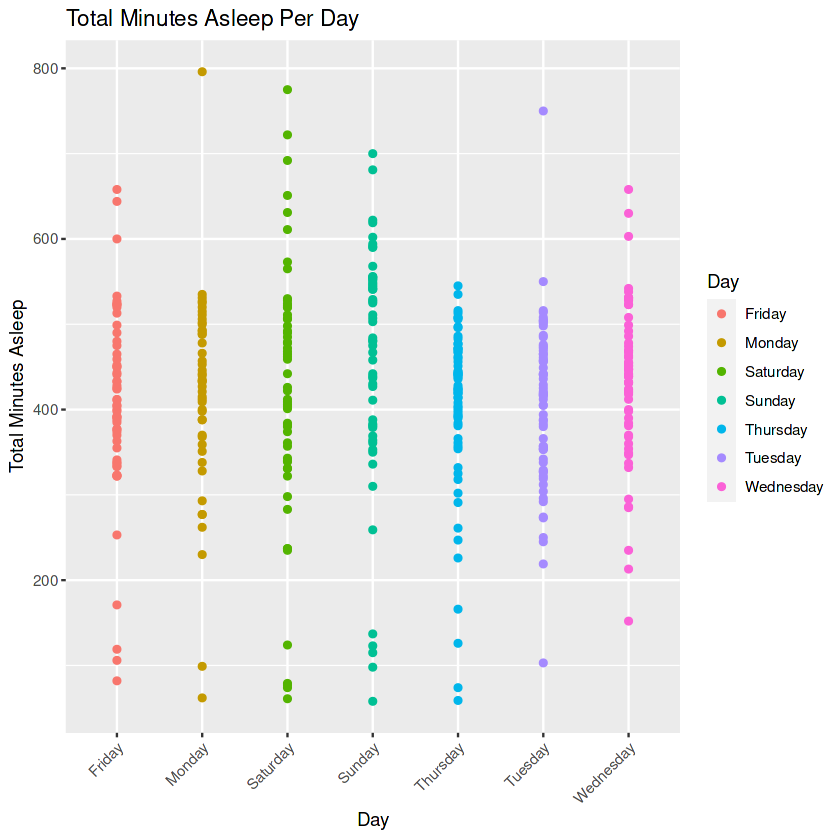

In [16]:
ggplot(activity_sleep, mapping = aes(x = Day, y = TotalMinutesAsleep, color = Day)) +
  geom_point() +
  labs(title = "Total Minutes Asleep Per Day",
       y = "Total Minutes Asleep") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

Not suprinsingly tt seems like poreple sleep less during the week in general and that the amount of hours increases during the weekends.

As a next step we want to see whether there is a correlation between hoours asleep and steps taken.

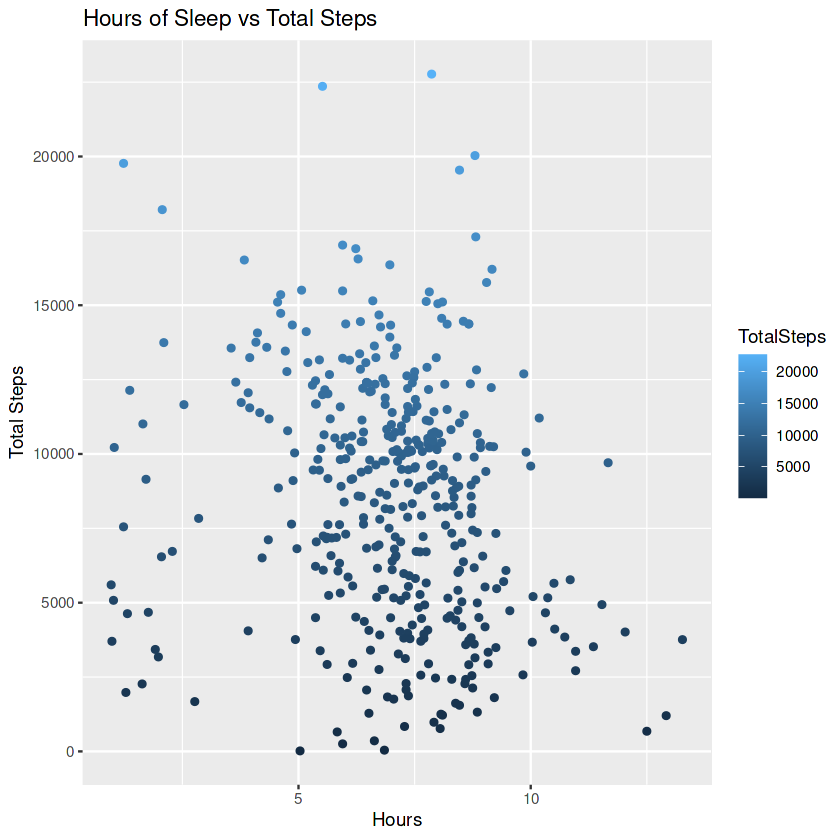

In [17]:
ggplot(activity_sleep, mapping = aes(x = TotalMinutesAsleep / 60, y = TotalSteps, color = TotalSteps)) +
  geom_point() +
  labs(title = "Hours of Sleep vs Total Steps",
       x = "Hours",
       y = "Total Steps")

One can see here that there were much more plotted points in the area where users got a sufficient number of hours of sleep. They also tended to be more active. On the other hand, those who slept less or too much are not as active and take less steps in general.



**Act**

**Summary of Results:**

* The majority of users do not take enough steps to be considered active.
* People were more active near the end of the week compared to the beginning, most likely to   having more free time on those days.
* Most users received a sufficient amount of sleep.
* Those who received enough sleep tended to be more active, and also tended to burn more       calories, so sleep can be related to better health.

**My recommendations for action for Bella Beat are as follows**

* Try collect own/ better data.
* implement the possibility to enter infomation about the mentsruation cycle as it also has a   high impact on sleep and activity.
* To have more engagement with the app one can think about a few gamification goodies - such   as Step Goals to be achieved, Quantity of day using the app - the icentive could be more     features in the app or vouchers or sth else.
* If bellabeat knows the mentruation cyclus and other things from the app they can do cross     sells or making themselves more interesting with information for specific situations


All in all these are only a few informal ideas. The main thing that needs to be done is collecting the right data in a bigger sample size.